In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r"C:\Users\mvsan\Desktop\Matplotlib\New folder\train.csv")
test=pd.read_csv(r"C:\Users\mvsan\Desktop\Matplotlib\New folder\test.csv")

In [3]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [5]:
print(train.count())

x    700
y    699
dtype: int64


In [6]:
train.dropna(axis=0,inplace=True)

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [8]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [9]:
X

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
...,...
695,58.0
696,93.0
697,82.0
698,66.0


In [10]:
X=X.to_numpy().reshape((699,))
y=y.to_numpy()

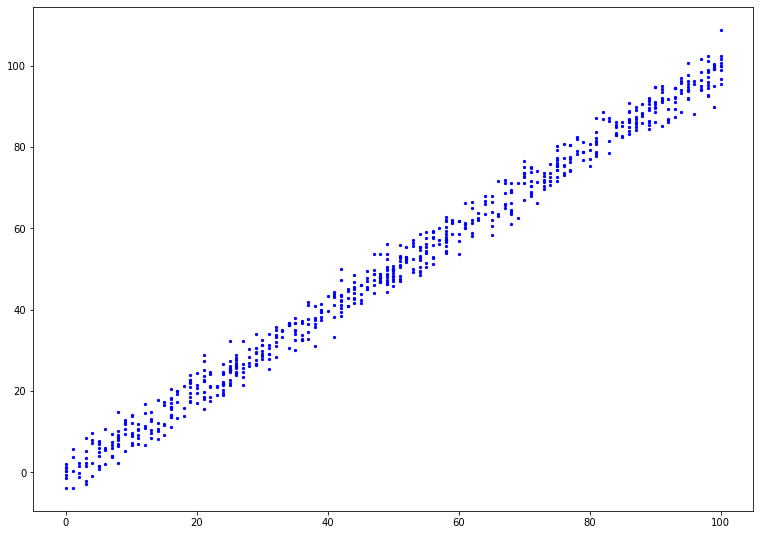

In [11]:
fig=plt.figure(figsize=(10,7))
ax=fig.add_axes([0,0,1,1])
ax.scatter(X,y,s=5,color='blue')

In [12]:
#slope/coefficient and intercept
m = 0
c = 0
#learning rate
L = 0.0001  
#epoch for mininum iterations to find minimum rss/mse
epochs = 1000  
#number of observations
n = float(len(X)) 
#derivatives wrt to m(theta1) and c(theta0) for the mse=(1/n)*summation(i=0 to n)of(y_pred(hypothesis fn) - y_actual)**2
for i in range(epochs): 
    y_pred = m*X + c  
    D_m = (-2/n) * sum(X * (y - y_pred)) 
    D_c = (-2/n) * sum(y - y_pred) 
    m = m - L * D_m  
    c = c - L * D_c   
print (m, c)

0.9989147221329964 0.008986573985034703


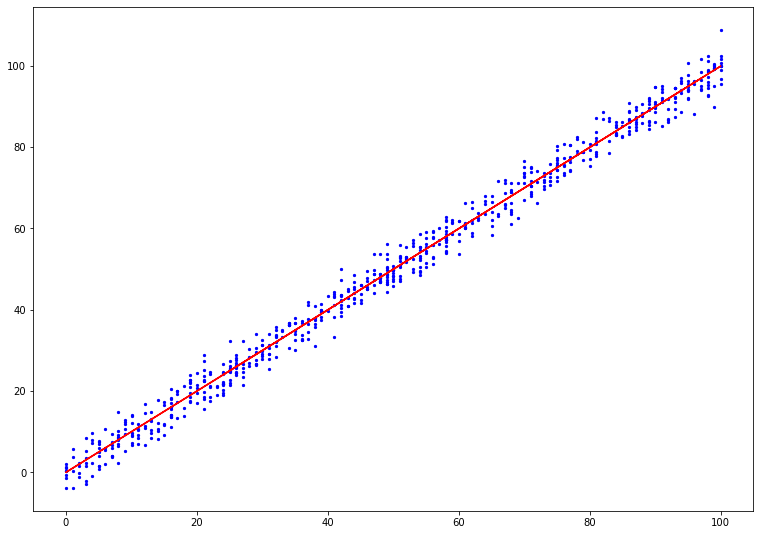

In [13]:
fig=plt.figure(figsize=(10,7))
ax=fig.add_axes([0,0,1,1])

ax.scatter(X,y,s=5,color='blue')
ax.plot(X,y_pred,color='red')

In [14]:
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,1]

In [15]:
y_pred_test=m*X_test+c
y_test_mean=y_test.mean()
tss=sum((y_test-y_test_mean)**2)
y_pred_test=y_pred_test.to_numpy().reshape((300,))
rss=sum((y_pred_test-y_test)**2)
r2score=1-(rss/tss)
print(r2score)

0.9887741964433369


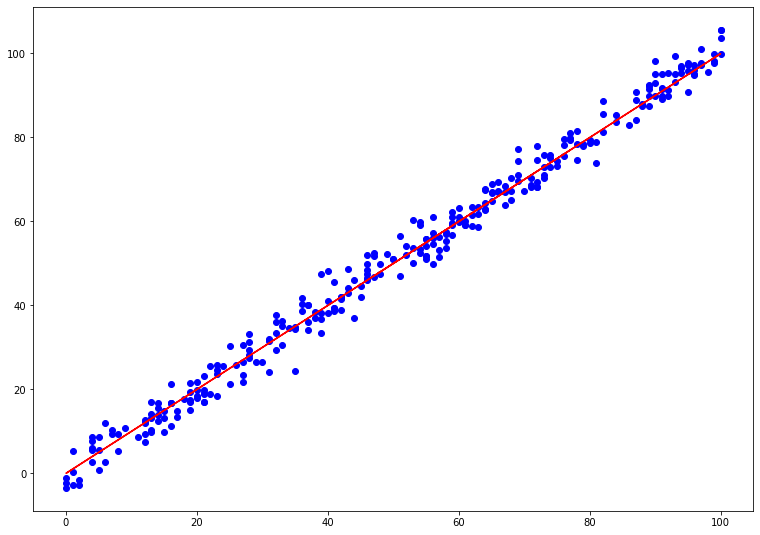

In [16]:
fig=plt.figure(figsize=(10,7))
ax=fig.add_axes([0,0,1,1])
ax.scatter(X_test,y_test,color='blue')
ax.plot(X_test,y_pred_test,color='red')